In [35]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-deep')

In [9]:
grad_df= pd.read_csv('Admission_Predict.csv')
grad_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


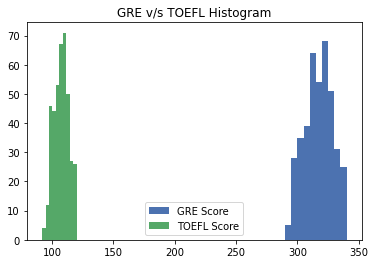

In [14]:
plt.hist(grad_df['GRE Score'], label='GRE Score')
plt.hist(grad_df['TOEFL Score'], label='TOEFL Score')
plt.legend()
plt.title('GRE v/s TOEFL Histogram')
plt.show()

<AxesSubplot:>

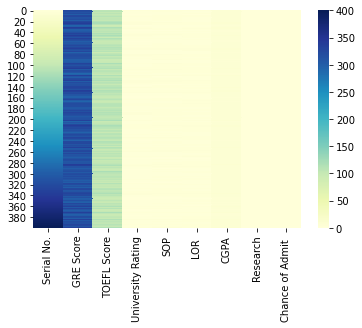

In [40]:
sns.heatmap(grad_df, cmap="YlGnBu")

<AxesSubplot:xlabel='GRE Score', ylabel='University Rating'>

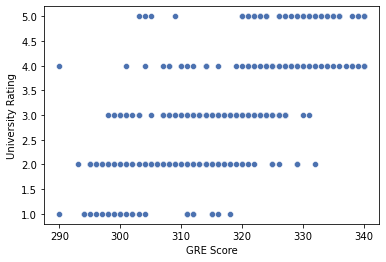

In [43]:
sns.scatterplot(data=grad_df, y='University Rating', x='GRE Score')

<AxesSubplot:xlabel='GRE Score', ylabel='CGPA'>

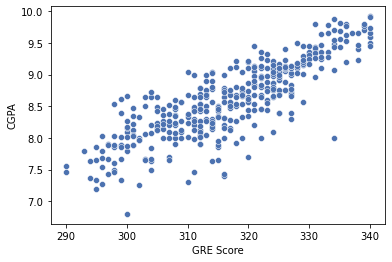

In [45]:
sns.scatterplot(data=grad_df, x='GRE Score', y='CGPA')

## Machine Learning Model
####  A Multi-Linear Regression Model

In [79]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(grad_df[['GRE Score','TOEFL Score','CGPA','University Rating','SOP','LOR ']])
y = np.asanyarray(grad_df[['Chance of Admit ']])
regr.fit(x, y)
# The coefficients
print ('Coefficients: ',regr.coef_)

Coefficients:  [[ 0.00227608  0.00275344  0.11987489  0.00606202 -0.0019614   0.0227486 ]]


### Prediction

In [75]:
test=pd.read_csv('Admission_Predict_Ver1.1.csv')
test.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [80]:
y_hat= regr.predict(test[['GRE Score','TOEFL Score','CGPA','University Rating','SOP','LOR ']])
x = np.asanyarray(test[['GRE Score','TOEFL Score','CGPA','University Rating','SOP','LOR ']])
y = np.asanyarray(test[['Chance of Admit ']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.00
Variance score: 0.82


#### Appending the Predicted Values to Test Dataset

In [77]:
test['Predcted Value']=y_hat
test.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Predcted Value
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.948685
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.786490
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.632170
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.751082
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.641409
5,6,330,115,5,4.5,3.0,9.34,1,0.90,0.895693
6,7,321,109,3,3.0,4.0,8.20,1,0.75,0.683126
7,8,308,101,2,3.0,4.0,7.90,0,0.68,0.581290
8,9,302,102,1,2.0,1.5,8.00,0,0.50,0.572128
9,10,323,108,3,3.5,3.0,8.60,0,0.45,0.738672
